# Problema de Máximo Flujo
##### Javier Navarro Espíndola

## Algoritmo de Ford Fulkerson

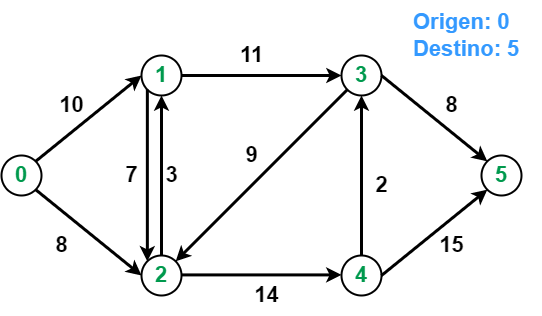

### Contstrucción del grafo

El grafo es representado con un diccionario, donde cada llave corresponde a un vértice $a$ y cada valor a un vértice $b$ donde $b$ recibe una arista de $a$. Los valores de cada llave son listas de 2 elementos. El primer elemento corresponde al vértice $b$ y el segundo corresponde a la capacidad de la arista.

In [148]:
# Grafo inicial. Aún no se crean los aristas residuales.
grafo = {'0':[['1',10],['2',8]], '1':[['2', 7],['3',11]], '2':[['1',3],['4',14]], '3':[['2',9],['5',8]], '4':[['3',2],['5',15]] }

In [149]:
# Grafo_residual. Se crean aristas en sentido contrario inicializados en capacidad 0.
grafo_residual = {'0':[['1',10],['2',8]], '1':[['2', 7],['3',11],['0',0]], '2':[['1',3],['4',14],['0',0],['3',0]], '3':[['2',9],['5',8],['1',0],['4',0]], '4':[['3',2],['5',15],['2',0]], '5':[['3',0],['4',0]] }

In [150]:
# Función de conveniencia para hacer pruebas desde 0, ya
# que el algoritmo modifica el grafo.
def reiniciar_grafo(grafo_residual):
    return {'0':[['1',10],['2',8]], '1':[['2', 7],['3',11],['0',0]], '2':[['1',3],['4',14],['0',0],['3',0]], '3':[['2',9],['5',8],['1',0],['4',0]], '4':[['3',2],['5',15],['2',0]], '5':[['3',0],['4',0]] }

In [151]:
grafo_residual

{'0': [['1', 10], ['2', 8]],
 '1': [['2', 7], ['3', 11], ['0', 0]],
 '2': [['1', 3], ['4', 14], ['0', 0], ['3', 0]],
 '3': [['2', 9], ['5', 8], ['1', 0], ['4', 0]],
 '4': [['3', 2], ['5', 15], ['2', 0]],
 '5': [['3', 0], ['4', 0]]}

### Búsqueda en anchura de caminos

Se va a hacer una búsqueda con un árbol para encontrar caminos posibles del origen al destino, para ello se debe definir la estructura de los nodos del árbol:

Nodo: ['Nombre_nodo', 'Nodos_por_los_que_ha_pasado_(incluyéndose)']

In [152]:
# Nodo origen:
origen = ['0', '0'] 

In [153]:
# Nombre del vértice que es el destino:
destino = '5'

In [154]:
# Función sucesor: busca los posibles nodos a los que
# puede ir flujo a partir del nodo en el que se encuentra
# (expande un nodo)
def hijos(grafo, nodo):
    llave = nodo[0]
    movimientos = nodo[1]
    vertices_vecinos = grafo[llave]
    vertices_vecinos_viables = []
    for vertice in vertices_vecinos:
        if vertice[1] != 0:
            vertices_vecinos_viables.append([vertice[0],movimientos+str(vertice[0])])
    return vertices_vecinos_viables

In [155]:
print('Del nodo origen',origen, 'se puede llegar a los nodos:')
print(hijos(grafo_residual, origen))

Del nodo origen ['0', '0'] se puede llegar a los nodos:
[['1', '01'], ['2', '02']]


In [156]:
from copy import deepcopy

In [157]:
# Función principal de la búsqueda en anchura.
def busqueda_anchura(Origen, Destino, Grafo):
    
    # La frontera de búsqueda es una lista donde se irán metiendo
    # nodos hijos factibles de los nodos que se exploren.
    frontera = []
    
    # El nodo raiz es el Origen, se mete a la frontera:
    frontera.append(Origen)

    # Conjunto de nodos visitados que sirve para no volver a expandir
    # nodos, quitando redundancia a la búsqueda y acelerándola:
    nodos_vistos_antes = set(Origen[0])

    # Ciclo principal de la búsqueda:
    while frontera:
        
        # Se saca el primer nodo de la frontera:
        nodo = frontera.pop(0)

        # Se verifica si el nodo es el destino, en tal caso termina la búsqueda.
        if nodo[0] == Destino:
            return nodo[1]

        # Se expande el nodo obteniendo una lista de nodos hijos:
        nodos_hijo = hijos(Grafo,nodo)

        # Se meten los nodos hijos a la frontera si es que no han sido explorados
        # antes y se meten al conjunto de nodos explorados.
        for nodo_hijo in nodos_hijo:
            if nodo_hijo[0] not in nodos_vistos_antes:
                frontera.append(nodo_hijo)
                nodos_vistos_antes.add(nodo_hijo[0])
    return False

In [158]:
busqueda_anchura(origen,destino,grafo_residual)

'0135'

### Actualización del grafo

Una vez encontrado un camino viable con la búsqueda en anchura, se debe encontrar su capacidad y restársele al grafo para posteriormente volver a buscar un camino viable ... etc..

In [159]:
# Función que calcula la capacidad mínima de un camino.
# La capacidad mínima corresponde a la capacidad más pequeña
# del conjunto de aristas que conforman al camino.
def capacidad_minima(grafo, camino):
    capacidades = []
    camino = camino
    for i in range(len(camino)-1):
        vertice_a = grafo[camino[i]]
        for j in range(len(vertice_a)):
            if vertice_a[j][0] == camino[i+1]:
                capacidades.append(vertice_a[j][1])
    return min(capacidades)

In [160]:
capacidad_minima(grafo_residual, '0135')

8

In [161]:
def actualizar_grafo(Grafo, camino):
    capacidad_camino = capacidad_minima(Grafo, camino)
    camino = camino
    for i in range(len(camino)-1):
        a = camino[i]
        for j in range(len(Grafo[camino[i]])):
            if Grafo[a][j][0] == camino[i+1]:
                Grafo[a][j][1] -= capacidad_camino
                for k in range(len(Grafo[camino[i+1]])):
                    #print(Grafo[camino[i+1]][k][0])
                    if Grafo[camino[i+1]][k][0] == camino[i]:
                        #print('entró')
                        Grafo[camino[i+1]][k][1] += capacidad_camino

In [162]:
grafo_residual

{'0': [['1', 10], ['2', 8]],
 '1': [['2', 7], ['3', 11], ['0', 0]],
 '2': [['1', 3], ['4', 14], ['0', 0], ['3', 0]],
 '3': [['2', 9], ['5', 8], ['1', 0], ['4', 0]],
 '4': [['3', 2], ['5', 15], ['2', 0]],
 '5': [['3', 0], ['4', 0]]}

In [163]:
actualizar_grafo(grafo_residual, '0135')

In [164]:
grafo_residual

{'0': [['1', 2], ['2', 8]],
 '1': [['2', 7], ['3', 3], ['0', 8]],
 '2': [['1', 3], ['4', 14], ['0', 0], ['3', 0]],
 '3': [['2', 9], ['5', 0], ['1', 8], ['4', 0]],
 '4': [['3', 2], ['5', 15], ['2', 0]],
 '5': [['3', 8], ['4', 0]]}

In [165]:
#grafo_residual = reiniciar_grafo(grafo_residual)

In [166]:
# Función que cuenta el flujo comparando un grafo original con
# un grafo resuelto con la función Ford_Fulkerson:
def contar_flujo(Grafo, Grafo_original, Origen):
    flujo = 0
    for i in range(len(Grafo[Origen])):
        flujo += Grafo_original[Origen][i][1] - Grafo[Origen][i][1]
    return flujo

In [194]:
contar_flujo(grafo_residual, reiniciar_grafo(grafo_residual), '0')

8

In [199]:
# Función que resta el grafo modificado al grafo original para
# obtener el flujo, es decir, el grafo solución:
def grafo_solucion(Grafo, Grafo_original):
    Grafo_solucion = {}
    for k in Grafo:
        hijos_k = []
        for i in range(len(Grafo[k])):
            
            if Grafo[k][i][1] < Grafo_original[k][i][1]:
                if Grafo_original[k][i][1] != 0:
                    #print(Grafo[k][i])
                    nombre_vertice = Grafo_original[k][i][0]
                    valor_original = Grafo_original[k][i][1]
                    valor_modificado = Grafo[k][i][1]
                    hijos_k.append([nombre_vertice, valor_original-valor_modificado])
        if hijos_k != []:
            Grafo_solucion[k] = hijos_k
    return Grafo_solucion

In [200]:
# Función principal.
# Se encuentra el máximo flujo en el grafo:
def Ford_Fulkerson(Origen, Destino, Grafo):
    
    # Se hace una copia del grafo para calcular el flujo al final
    # comparándolo con el grafo modificado:
    Grafo_original = deepcopy(Grafo)
    
    # Se encuentra un camino posible usando búsqueda en anchura:
    camino_posible = busqueda_anchura(Origen, Destino, Grafo)
    
    # Ciclo principal:
    # Se busca camino posible, se actualiza el grafo, se busca camino posible, se ...
    # ... hasta que ya no haya caminos posibles
    while True:
        camino_posible = busqueda_anchura(Origen, Destino, Grafo)
        if not camino_posible:
            break
        actualizar_grafo(Grafo, camino_posible)
        
    # Se regresa el grafo solución y el flujo
    return grafo_solucion(Grafo,Grafo_original), contar_flujo(Grafo, Grafo_original, Origen[0])

In [201]:
grafo_solucion, flujo_solucion = Ford_Fulkerson(['0','0'], '5', reiniciar_grafo(grafo_residual))

In [202]:
grafo_solucion

{'0': [['1', 10], ['2', 8]],
 '1': [['2', 2], ['3', 8]],
 '2': [['4', 10]],
 '3': [['5', 8]],
 '4': [['5', 10]]}

In [203]:
flujo_solucion

18

### Solución gráfica

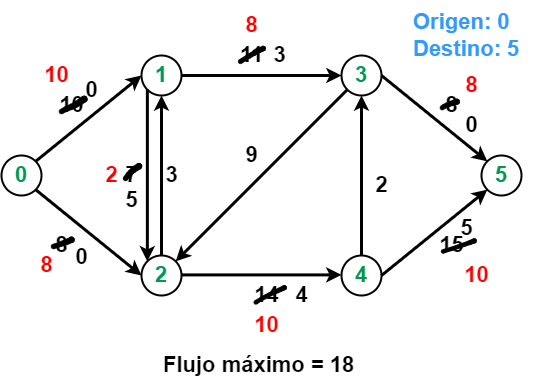

## Método SIMPLEX

In [204]:
from scipy.optimize import linprog

In [205]:
import numpy as np

### Planteamiento del problema como problema de programación lineal

Max $c^{T}x$ sujeta a $Ax \le b, x \ge 0$

$
c^T=
\begin{bmatrix} 
         0 & -1 &-1 &  0 &  0&  0&  0&  0&  0&  0&  0&  0
\end{bmatrix}
$


$
x^T=
\begin{bmatrix} 
        f & x01 & x02 & x12 & x13 & x21 & x24 & x32 & x35 & x43 & x45
\end{bmatrix}
$

$
A=
\begin{bmatrix} 
        -1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
         0 &-1 & 0 & 1 & 1 &-1 & 0 & 0 & 0 & 0 & 0 \\
         0 & 0 &-1 &-1 & 0 & 1 & 1 &-1 & 0 & 0 & 0 \\
         0 & 0 & 0 & 0 &-1 & 0 & 0 & 1 & 1 &-1 & 0 \\
         0 & 0 & 0 & 0 & 0 & 0 &-1 & 0 & 0 & 1 & 1 \\
         1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &-1 & 0 &-1 \\
         0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
         0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
         0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
         0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
         0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
         0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
         0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
         0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
         0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
         0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 
\end{bmatrix}
$


$
b^T= 
\begin{bmatrix}
    0 & 0 & 0 & 0 & 0 & 0 & 10 & 8 & 7 & 11 & 3 & 14 & 9 & 8 & 2 & 15 
\end{bmatrix}
$

### Captura de datos

In [206]:
#x = [f, x01, x02, x12, x13, x21, x24, x32, x35, x43, x45]

In [207]:
    #          f  0-1 0-2 1-2 1-3 2-1 2-4 3-2 3-5 4-3 4-5   f
c = np.array([[0,   1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])*-1

In [208]:
c

array([[ 0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [209]:
A = np.array([
  #   f  0-1 0-2 1-2 1-3 2-1 2-4 3-2 3-5 4-3 4-5
    [-1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0], # 0
    [ 0, -1,  0,  1,  1, -1,  0,  0,  0,  0,  0], # 1
    [ 0,  0, -1, -1,  0,  1,  1, -1,  0,  0,  0], # 2
    [ 0,  0,  0,  0, -1,  0,  0,  1,  1, -1,  0], # 3
    [ 0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1], # 4
    [ 1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1], # 5
    
    [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0], # 0-1
    [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0], # 0-2
    [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0], # 1-2
    [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0], # 1-3
    [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0], # 2-1 
    [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0], # 2-4
    [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0], # 3-2
    [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0], # 3-5
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0], # 4-3
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1], # 4-5  
])

In [210]:
#                           0-1 0-2 1-2 1-3 2-1 2-4 3-2 3-5 4-3 4-5
b = np.array([[0,0,0,0,0,0,  10,  8,  7, 11,  3, 14,  9,  8,  2, 15]]).T

In [211]:
Ab = np.hstack((A, b))

In [212]:
Ab

array([[-1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  1,  1, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1, -1,  0,  1,  1, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  1,  1, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  8],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  7],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0, 11],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, 14],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  9],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 15]])

In [213]:
Ab_c = np.vstack((Ab,c))

In [214]:
Ab_c

array([[-1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  1,  1, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1, -1,  0,  1,  1, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  1,  1, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  8],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  7],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0, 11],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, 14],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  9],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 15],
       [ 0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [215]:
c[:,:-1]

array([[ 0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0]])

### SIMPLEX

In [216]:
res = linprog(c[:,:-1], A, b)

In [217]:
res

     con: array([], dtype=float64)
     fun: -17.999999999778076
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([-5.61417579e-12, -1.05160325e-12,  6.64002187e-12,  2.93098879e-13,
       -6.46904752e-12,  6.20303808e-12,  1.58323132e-10,  6.35997921e-11,
        3.90028429e+00,  2.47175457e+00,  1.37203886e+00,  2.00275008e+00,
        6.47450464e+00,  9.92239967e-01,  9.94990042e-01,  4.00776003e+00])
  status: 0
 success: True
       x: array([18.        , 10.        ,  8.        ,  3.09971571,  8.52824543,
        1.62796114, 11.99724992,  2.52549536,  7.00776003,  1.00500996,
       10.99223997])

In [218]:
aristas = ['f','0-1', '0-2', '1-2', '1-3', '2-1', '2-4', '3-2', '3-5', '4-3', '4-5']


In [222]:
for x_i,nombre in zip(res.x,aristas):
    print(nombre,':',round(x_i,2))

f : 18.0
0-1 : 10.0
0-2 : 8.0
1-2 : 3.1
1-3 : 8.53
2-1 : 1.63
2-4 : 12.0
3-2 : 2.53
3-5 : 7.01
4-3 : 1.01
4-5 : 10.99


### Solución gráfica


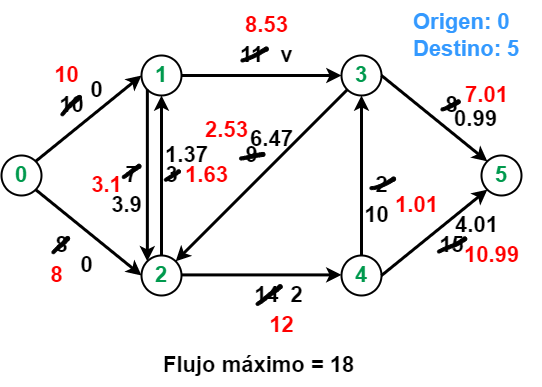

Nótese que incluso redondeando el resultado, las equivalencias se mantienen. Entra lo mismo que sale a cada vértice.